In [40]:
from collections import Counter
import operator
import re
import psycopg2 as pg2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords
import string
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize.treebank import TreebankWordDetokenizer
#import nlp

In [41]:
conn = pg2.connect(dbname='dsjob', host='localhost',
                    password='docker', user='postgres')
conn.autocommit = True
cur = conn.cursor()

cur.execute("SELECT * FROM indeed;")
l=[]
for item in cur.fetchall():
    l.append(item)

df=pd.DataFrame(l, columns=["job_jk", "job_title",  "job_location",  "company_name", "salary", "description"])

In [42]:
df.head()

,job_jk,job_title,job_location,company_name,salary,description
0,1bce25f0b7e3723d,"Senior Data Scientist – Image Analytics, Novar...","Cambridge, MA",Novartis,No salary given,\n\nWe believe the answers are found when curi...
1,1486880d275ce7c1,Senior Scientist Deep Data Analytics,"Cambridge, MA 02142",Sanofi,No salary given,Sanofi is a global life sciences company commi...
2,7d6ac302ac846400,Senior Manager of Data Science – Cyber Security,"Boston, MA 02298",No company info,No salary given,\nPrimary Responsibilities:\n Product ownershi...
3,3100f3d85650c469,Enterprise Architect Data,"Boston, MA",MassMutual,No salary given,\nA career with us means you will work alongsi...
4,3de16480e89bcaa2,Post Doctoral Fellow,"Cambridge, MA",Eisai,No salary given,"\n\nAt G2D2, we focus not only on how such dat..."


In [43]:
vectorizer_0 = TfidfVectorizer(stop_words = "english", max_features = None)
docs_tfidf_0 = vectorizer_0.fit_transform(df['description'])
X = vectorizer_0.fit_transform(df['description'])
nmf = NMF(n_components=50, random_state =0)
W= nmf.fit_transform(X)
H = nmf.components_

vocab = vectorizer_0.get_feature_names()
words_per_topic = []
for i in range(H.shape[0]):
    l=[]
    for e in H[i].argsort()[::-1][0:10]:
        l.append(vocab[e])
    print(l)
    words_per_topic.append(l)
#words_per_topic    

['data', 'big', 'science', 'pipelines', 'etl', 'sources', 'sql', 'sets', 'quality', 'warehouse']
['project', 'management', 'ability', 'skills', 'projects', 'support', 'work', 'program', 'required', 'manage']
['university', 'teaching', 'faculty', 'students', 'department', 'edu', 'undergraduate', 'graduate', 'school', 'college']
['software', 'development', 'systems', 'engineering', 'test', 'engineers', 'technical', 'code', 'technologies', 'agile']
['accenture', 'data', 'gcp', 'visa', 'cloud', 'delivery', 'minimum', 'client', 'sheer', 'storage']
['deloitte', 'people', 'cognitive', 'tips', 'learn', 'clients', 'help', 'confident', 'offer', 'professionals']
['iqvia', 'healthcare', 'takes', 'reasonable', 'accommodation', 'application', 'workday_recruiting', 'brave', 'arrange', 'ultimately']
['data', 'll', 'training', 'access', 'booz', 'allen', 'certifications', 'change', 'answers', 'use']
['intelligence', 'll', 'warfighters', 'abroad', 'booz', 'allen', 'skills', 'clearance', 'information', 's

In [44]:
def max_feature_topic_search_backup(input_pdseries,m_feature_n, topic_n):
    for m in m_feature_n:
        for n in topic_n:
            vectorizer = TfidfVectorizer(stop_words = my_stop_words, max_features = m)
            X = vectorizer.fit_transform(input_pdseries)
            nmf = NMF(n_components=n, random_state =0)
            W= nmf.fit_transform(X)
            H = nmf.components_
            vocab = vectorizer.get_feature_names()
            words_per_topic = []
            print ("------------------------------------------------")
            print ("max features = {}, n of topics ={}".format(m, n))
            for i in range(H.shape[0]):
                l=[]
                for e in H[i].argsort()[::-1][0:10]:
                    l.append(vocab[e])
                print("topic {}".format(i))
                print(l)
                words_per_topic.append(l)
            
    

In [45]:
def max_feature_topic_search(input_pdseries,m_feature_n, topic_n, stop_words):
    for m in m_feature_n:
        for n in topic_n:
            vectorizer = TfidfVectorizer(stop_words = stop_words, max_features = m)
            X = vectorizer.fit_transform(input_pdseries)
            nmf = NMF(n_components=n, random_state =0)
            W= nmf.fit_transform(X)
            H = nmf.components_
            vocab = vectorizer.get_feature_names()
            words_per_topic = []
            print ("------------------------------------------------")
            print ("max features = {}, n of topics ={}".format(m, n))
            for i in range(H.shape[0]):
                l=[]
                for e in H[i].argsort()[::-1][0:10]:
                    l.append(vocab[e])
                print("topic {}".format(i))
                print(l)
                words_per_topic.append(l)

In [46]:
def max_feature_search_svd(input_pdseries,m_feature_n, stop_words):
    for m in m_feature_n:
        for n in topic_n:
            vectorizer = TfidfVectorizer(stop_words = stop_words, max_features = m)
            X = vectorizer.fit_transform(input_pdseries)
            u, s, vh = np.linalg.svd(X.toarray(), full_matrices=True)
            vocab = vectorizer.get_feature_names()
            words_per_topic = []
            print ("------------------------------------------------")
            print ("max features = {}, n of topics ={}".format(m, n))
            for i in range(vh.shape[0]):
                l=[]
                for e in vh[i].argsort()[::-1][0:10]:
                    l.append(vocab[e])
                print("topic {}".format(i))
                print(l)
                words_per_topic.append(l)

In [8]:
m_feature_n =[20000, 10000, 5000, 2000, 1000]
topic_n = [40, 20, 10, 8, 6, 4]

max_feature_topic_search(df['description'], m_feature_n, topic_n, stopwords.words("english"))

------------------------------------------------
max features = 20000, n of topics =40
topic 0
['data', 'experience', 'big', 'pipelines', 'etl', 'science', 'sql', 'tools', 'sources', 'sets']
topic 1
['iqvia', 'healthcare', 'takes', 'reasonable', 'accommodation', 'application', 'workday_recruiting', 'brave', 'arrange', 'impact']
topic 2
['project', 'management', 'ability', 'skills', 'required', 'work', 'projects', 'knowledge', 'support', 'requirements']
topic 3
['software', 'experience', 'development', 'systems', 'engineering', 'test', 'code', 'engineers', 'technologies', 'engineer']
topic 4
['accenture', 'visa', 'employment', 'authorization', 'client', 'status', 'clients', 'technology', 'delivery', 'business']
topic 5
['deloitte', 'people', 'cognitive', 'tips', 'learn', 'clients', 'help', 'confident', 'every', 'offer']
topic 6
['learning', 'machine', 'ai', 'ml', 'models', 'algorithms', 'deep', 'science', 'data', 'nlp']
topic 7
['status', 'gender', 'employment', 'protected', 'origin', '

------------------------------------------------
max features = 20000, n of topics =8
topic 0
['data', 'business', 'analytics', 'experience', 'analysis', 'models', 'statistical', 'modeling', 'science', 'tools']
topic 1
['product', 'marketing', 'business', 'team', 'customer', 'sales', 'work', 'strategy', 'teams', 'management']
topic 2
['research', 'university', 'teaching', 'faculty', 'position', 'health', 'department', 'students', 'information', 'program']
topic 3
['experience', 'software', 'learning', 'cloud', 'aws', 'amazon', 'systems', 'machine', 'engineering', 'development']
topic 4
['accenture', 'cloud', 'data', 'azure', 'client', 'visa', 'employment', 'delivery', 'clients', 'status']
topic 5
['deloitte', 'clients', 'people', 'cognitive', 'client', 'learn', 'business', 'tips', 'help', 'offer']
topic 6
['iqvia', 'healthcare', 'takes', 'accommodation', 'reasonable', 'clinical', 'patients', 'clients', 'health', 'client']
topic 7
['intelligence', 'clearance', 'security', 'booz', 'allen

------------------------------------------------
max features = 10000, n of topics =10
topic 0
['data', 'business', 'analytics', 'experience', 'analysis', 'tools', 'sql', 'ability', 'reporting', 'insights']
topic 1
['product', 'marketing', 'sales', 'iqvia', 'business', 'team', 'customer', 'client', 'experience', 'management']
topic 2
['research', 'university', 'teaching', 'faculty', 'students', 'department', 'health', 'position', 'edu', 'science']
topic 3
['experience', 'software', 'development', 'cloud', 'systems', 'design', 'data', 'technologies', 'engineering', 'technical']
topic 4
['accenture', 'cloud', 'data', 'client', 'azure', 'visa', 'clients', 'delivery', 'gcp', 'employment']
topic 5
['deloitte', 'people', 'clients', 'cognitive', 'business', 'tips', 'learn', 'client', 'help', 'every']
topic 6
['learning', 'machine', 'data', 'models', 'experience', 'algorithms', 'science', 'ai', 'ml', 'deep']
topic 7
['status', 'employment', 'microsoft', 'protected', 'qualified', 'gender', 'dis

------------------------------------------------
max features = 5000, n of topics =20
topic 0
['data', 'analytics', 'experience', 'sql', 'big', 'science', 'sets', 'tools', 'pipelines', 'etl']
topic 1
['team', 'work', 'people', 'company', 'us', 'help', 'world', 'best', 'make', 'build']
topic 2
['university', 'research', 'teaching', 'faculty', 'students', 'department', 'edu', 'undergraduate', 'graduate', 'position']
topic 3
['software', 'experience', 'development', 'systems', 'cloud', 'design', 'technical', 'technologies', 'security', 'engineering']
topic 4
['iqvia', 'healthcare', 'takes', 'reasonable', 'accommodation', 'clients', 'application', 'workday_recruiting', 'brave', 'arrange']
topic 5
['deloitte', 'clients', 'people', 'cognitive', 'tips', 'client', 'learn', 'help', 'confident', 'every']
topic 6
['learning', 'machine', 'models', 'algorithms', 'experience', 'statistical', 'data', 'techniques', 'ml', 'ai']
topic 7
['status', 'employment', 'gender', 'protected', 'national', 'leidos

------------------------------------------------
max features = 2000, n of topics =20
topic 0
['data', 'analysis', 'statistical', 'experience', 'modeling', 'statistics', 'models', 'techniques', 'quantitative', 'analytical']
topic 1
['university', 'research', 'teaching', 'faculty', 'students', 'department', 'edu', 'undergraduate', 'graduate', 'candidates']
topic 2
['team', 'work', 'people', 'company', 'us', 'help', 'world', 'best', 'make', 'love']
topic 3
['experience', 'software', 'systems', 'development', 'cloud', 'design', 'technical', 'technologies', 'engineering', 'security']
topic 4
['business', 'analytics', 'management', 'project', 'solutions', 'amp', 'ability', 'technical', 'strategy', 'leadership']
topic 5
['iqvia', 'healthcare', 'takes', 'reasonable', 'accommodation', 'patients', 'clients', 'application', 'arrange', 'ultimately']
topic 6
['accenture', 'cloud', 'client', 'azure', 'visa', 'clients', 'delivery', 'employment', 'technology', 'gcp']
topic 7
['deloitte', 'clients', '

------------------------------------------------
max features = 1000, n of topics =20
topic 0
['data', 'big', 'science', 'pipelines', 'analytics', 'etl', 'sql', 'tools', 'experience', 'sources']
topic 1
['university', 'teaching', 'faculty', 'students', 'department', 'edu', 'graduate', 'undergraduate', 'college', 'candidates']
topic 2
['team', 'work', 'people', 'company', 'us', 'help', 'world', 'make', 'best', 'love']
topic 3
['software', 'experience', 'development', 'design', 'systems', 'engineering', 'code', 'test', 'web', 'technologies']
topic 4
['statistical', 'analysis', 'data', 'business', 'experience', 'analytics', 'modeling', 'models', 'analytical', 'insights']
topic 5
['iqvia', 'healthcare', 'takes', 'accommodation', 'reasonable', 'sales', 'application', 'clients', 'impact', 'client']
topic 6
['status', 'employment', 'gender', 'protected', 'qualified', 'disability', 'applicants', 'origin', 'race', 'color']
topic 7
['deloitte', 'clients', 'people', 'learn', 'client', 'help', 'ev

token = nltk.word_tokenize(" ".join(df['description'].map(str)).lower())
len(token)
9170386

In [47]:
def tokenize_lemmatize(text_str):
    lemmatizer = WordNetLemmatizer()
    token = nltk.word_tokenize(text_str.lower())
    return [lemmatizer.lemmatize(e) for e in token]
    

In [48]:
my_stop_words = stopwords.words('english')
len(my_stop_words)


179

In [49]:
my_stop_words.extend(list(string.punctuation))
my_stop_words.extend(['--'])
my_stop_words.extend(["amp", "&amp"])
len(my_stop_words)

214

In [50]:
def n_grams_freq(tokens, n, stopwords):
    n_grams = ngrams(tokens,n)
    n_grams_sort = sorted(Counter(n_grams).items(), key = operator.itemgetter(1), reverse = True)
    
    return ( [(k,v) for k, v in n_grams_sort if all([e not in stopwords for e in k])] )

In [15]:
description_lemma_token =  tokenize_lemmatize(" ".join(df['description'].map(str)))


In [10]:
with open('description_lemma_token.txt', 'w+') as filehandle:
    for e in description_lemma_token:
        filehandle.write("%s\n" % e)

NameError: name 'description_lemma_token' is not defined

In [51]:
with open('description_lemma_token.txt', 'r+') as filehandle:
    content = filehandle.readlines()
description_lemma_token = [x.strip() for x in content]

In [52]:
ngrams_2 = n_grams_freq(description_lemma_token,2, my_stop_words)
ngrams_3 = n_grams_freq(description_lemma_token,3, my_stop_words)
ngrams_4 = n_grams_freq(description_lemma_token,4, my_stop_words)

In [16]:
print(len(ngrams_2),len(ngrams_3),  len(ngrams_4))

453429 469588 267013


In [17]:
ngrams_4[0:40]

[(('equal', 'opportunity/affirmative', 'action', 'employer'), 525),
 (('client', 'drive', 'healthcare', 'forward'), 416),
 (('inc.', 'provides', 'reasonable', 'accommodation'), 379),
 (('human', 'health', 'take', 'insight'), 373),
 (('best', 'work', 'every', 'day'), 319),
 (('san', 'francisco', 'fair', 'chance'), 314),
 (('francisco', 'fair', 'chance', 'ordinance'), 314),
 (('equal', 'opportunity', 'employer', '–'), 298),
 (('equal', 'opportunity-affirmative', 'action', 'employer'), 295),
 (('opportunity', 'employer', '–', 'minority'), 283),
 (('opportunity-affirmative', 'action', 'employer', '–'), 277),
 (('action', 'employer', '–', 'minority'), 271),
 (('protected', 'characteristic—to', 'fearlessly', 'drive'), 252),
 (('characteristic—to', 'fearlessly', 'drive', 'change'), 252),
 (('also', 'consider', 'qualified', 'applicant'), 248),
 (('provides', 'equal', 'employment', 'opportunity'), 244),
 (('consider', 'qualified', 'applicant', 'regardless'), 239),
 (('equal', 'employment', 'opp

In [18]:
ngrams_3[0:150]

[(('equal', 'opportunity', 'employer'), 4046),
 (('employment', 'without', 'regard'), 2319),
 (('bachelor', "'s", 'degree'), 1788),
 (('protected', 'veteran', 'status'), 1646),
 (('equal', 'employment', 'opportunity'), 1573),
 (('data', 'science', 'team'), 1550),
 (('written', 'communication', 'skill'), 1400),
 (('large', 'data', 'set'), 1014),
 (('natural', 'language', 'processing'), 935),
 (('year', '’', 'experience'), 921),
 (('machine', 'learning', 'model'), 886),
 (('verbal', 'communication', 'skill'), 879),
 (('subject', 'matter', 'expert'), 861),
 (('master', "'s", 'degree'), 834),
 (('machine', 'learning', 'algorithm'), 753),
 (('machine', 'learning', 'technique'), 743),
 (('proven', 'track', 'record'), 677),
 (('opportunity/affirmative', 'action', 'employer'), 594),
 (('affirmative', 'action', 'employer'), 590),
 (('equal', 'opportunity/affirmative', 'action'), 571),
 (('excellent', 'communication', 'skill'), 558),
 (('employer', '–', 'minority'), 556),
 (('big', 'data', 'tech

In [19]:
ngrams_2[0:1500]

[(('data', 'science'), 19085),
 (('machine', 'learning'), 12113),
 (('computer', 'science'), 7092),
 (('data', 'scientist'), 6628),
 (('sexual', 'orientation'), 6062),
 (('national', 'origin'), 5497),
 (('communication', 'skill'), 5262),
 (('gender', 'identity'), 5166),
 (('equal', 'opportunity'), 5126),
 (('big', 'data'), 4895),
 (('opportunity', 'employer'), 4554),
 (('veteran', 'status'), 4527),
 (('experience', 'working'), 4112),
 (('without', 'regard'), 3538),
 (('data', 'analysis'), 3459),
 (('related', 'field'), 3251),
 (('qualified', 'applicant'), 3197),
 (('data', 'set'), 3191),
 (('team', 'member'), 3125),
 (('best', 'practice'), 3093),
 (('bachelor', '’'), 2921),
 (('data', 'analytics'), 2693),
 (("'s", 'degree'), 2677),
 (('software', 'development'), 2602),
 (('data', 'management'), 2453),
 (('work', 'experience'), 2389),
 (('marital', 'status'), 2384),
 (('employment', 'without'), 2351),
 (('reasonable', 'accommodation'), 2323),
 (('data', 'visualization'), 2272),
 (('busi

In [53]:
def get_n_gram_hyphenated(input_str, ngram_list):
    rep = {" ".join(t) : "-".join(t) for t, c in ngram_list }
    rep = dict((re.escape(k), v) for k, v in rep.items()) 
    pattern = re.compile("|".join(rep.keys()))
    return pattern.sub(lambda m: rep[re.escape(m.group(0))], str(input_str).lower())

In [54]:
def get_lower_lemmatized(input_str):
    result = input_str.lower()
    result = TreebankWordDetokenizer().detokenize(tokenize_lemmatize(result))
    return result

In [25]:
df_descr = df['description']

df_rep = df_descr.apply(lambda row: get_n_gram_hyphenated(row, ngrams_3[0:500]))
df_rep2 = df_rep.apply(lambda row: get_n_gram_hyphenated(row, ngrams_2[0:1500]))


In [26]:
df_rep.to_pickle("./df_rep.pkl")
df_rep2.to_pickle("./df_rep2.pkl")

In [28]:
df_lower_lemma = df['description'].apply(lambda row: get_lower_lemmatized(row))
df_lower_lemma.to_pickle("./df_lower_lemma.pkl")

In [29]:
df_rep3 =  df_lower_lemma.apply(lambda row: get_n_gram_hyphenated(row, ngrams_3[0:500]))
df_rep4 = df_rep3.apply(lambda row: get_n_gram_hyphenated(row, ngrams_2[0:1500]))
df_rep3.to_pickle("./df_rep3.pkl")
df_rep4.to_pickle("./df_rep4.pkl")

In [30]:
df_rep5 =  df_lower_lemma.apply(lambda row: get_n_gram_hyphenated(row, ngrams_3[0:10]))
df_rep6 = df_rep5.apply(lambda row: get_n_gram_hyphenated(row, ngrams_2[0:10]))
df_rep5.to_pickle("./df_rep5.pkl")
df_rep6.to_pickle("./df_rep6.pkl")

In [55]:
df_rep2 = pd.read_pickle("./df_rep2.pkl")
df_rep4 = pd.read_pickle("./df_rep4.pkl")
df_rep6 = pd.read_pickle("./df_rep6.pkl")

In [16]:
vectorizer_1 = TfidfVectorizer(stop_words = my_stop_words)

docs_tfidf_1 = vectorizer_1.fit_transform(df_rep2)
len(vectorizer_1.get_feature_names())

48377

In [17]:
vectorizer_2 = TfidfVectorizer(stop_words = my_stop_words)

docs_tfidf_2 = vectorizer_2.fit_transform(df_rep4)
len(vectorizer_2.get_feature_names())

46069

In [18]:
vectorizer_3 = TfidfVectorizer(stop_words = my_stop_words)

docs_tfidf_3 = vectorizer_3.fit_transform(df_rep6)
len(vectorizer_3.get_feature_names())

46069

In [18]:
vectorizer_3_5k = TfidfVectorizer(stop_words = my_stop_words, max_features =5000)
docs_tfidf_3_5k = vectorizer_3_5k.fit_transform(df_rep6)
len(vectorizer_3_5k.get_feature_names())

5000

In [19]:
vectorizer_3_2k = TfidfVectorizer(stop_words = my_stop_words, max_features =2000)
docs_tfidf_3_2k = vectorizer_3_2k.fit_transform(df_rep6)
len(vectorizer_3_2k.get_feature_names())

2000

In [20]:
vectorizer_3_1k = TfidfVectorizer(stop_words = my_stop_words, max_features =1000)
docs_tfidf_3_1k = vectorizer_3_1k.fit_transform(df_rep6)
len(vectorizer_3_1k.get_feature_names())

1000

In [56]:
vectorizer_3_500 = TfidfVectorizer(stop_words = my_stop_words, max_features =500)
docs_tfidf_3_500 = vectorizer_3_500.fit_transform(df_rep6)
len(vectorizer_3_500.get_feature_names())

500

In [57]:
vectorizer_3_200 = TfidfVectorizer(stop_words = my_stop_words, max_features =200)
docs_tfidf_3_200 = vectorizer_3_200.fit_transform(df_rep6)
len(vectorizer_3_200.get_feature_names())

200

In [58]:


def get_tf_idf_query_similarity(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    #query_lower= " ".join(tokenize_lemmatize(query.lower()))
    #query= " ".join(tokenize_lemmatize(query))
    #query_tfidf = vectorizer.transform([query_lower])
    #print(query)
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities


In [59]:

def get_tf_idf_query_similarity2(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    
    
    query = get_n_gram_hyphenated(query, ngrams_3[0:500])
    query =  get_n_gram_hyphenated(query, ngrams_2[0:1500])
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities

In [60]:
def get_tf_idf_query_similarity3(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    query = query.lower()
    query = TreebankWordDetokenizer().detokenize(tokenize_lemmatize(query))
    query = get_n_gram_hyphenated(query, ngrams_3[0:500])
    query =  get_n_gram_hyphenated(query, ngrams_2[0:1500])
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities

In [61]:
def get_tf_idf_query_similarity4(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    query = query.lower()
    query = TreebankWordDetokenizer().detokenize(tokenize_lemmatize(query))
    query = get_n_gram_hyphenated(query, ngrams_3[0:10])
    query =  get_n_gram_hyphenated(query, ngrams_2[0:10])
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities

In [62]:
test_resume_data_scientist = '''Malik Rabb

Seattle, WA • (123) 456-7891
mrabb@email.com
SUMMARY

Data Scientist with strong math background and 3+ years of experience using predictive modeling, data processing, and data mining algorithms to solve challenging business problems. Involved in Python open source community and passionate about deep reinforcement learning.
EDUCATION
Coral Springs University
Current - Current

Bachelor of Science in Mathematics
EXPERIENCE
River Tech, Data Scientist
Current - Current

    Built fuzzy matching algorithm using k-nearest neighbors to identify non-exact matching duplicates
    Designed and developed real time recommendation engine to rank sales leads for upsell opportunities
    Refined personalization algorithms for 1M+ customers on web and mobile
    Transformed raw data into MySQL with custom-made ETL application to prepare unruly data for machine learning

Retail Ocean, Data Scientist
Current - Current

    Leveraged 200M+ tweets to develop sentiment analysis model that helped improve sales and marketing strategies
    Used Python and Spark to scrape, clean, and analyze large datasets
    Helped build tools for detecting botnets with machine learning and data mining

SKILLS

    2nd place at Coral Springs Big Data Hackathon (out of 150+ participants)
    Java, Python, C++, Hadoop ecosystem, and MySQL
    Data cleansing, modeling, and mining
    Machine learning
'''

In [63]:
test_resume_software_enginner = '''Ivy Haddington

Austin, TX • (123) 456-7891
ihaddington@email.com
SUMMARY

Focused and quick-learning Software Engineer with 3 years of experience in computer science, programming, and UX design for various projects and clients.
EDUCATION
Hawaii Western
Aug '10 - May '14

Bachelor of Science in Electrical Engineering
EXPERIENCE
Crane & Jenkins, Software Engineer
Feb '15 - Current

    Integrate code changes, test code changes, and document code changes
    Developed Perl and PHP scripts to translate data between applications
    Developed automation scripts to test storage appliances in Python
    Practice agile development methodologies and work with current networking technologies
    Used Hadoop to build a scalable distributed data solution

Tradelot, Software Developer
Current - Current

    Wrote, modified, and debugged software for clients
    Developed code to complete assigned project by deadline
    Developed HTML, CSS, JavaScript, and JSP pages for user interaction
    Wrote Python scripts to load data and parse XML documents 

SKILLS

    Certified Scrum Master
    Cisco Certified Network Associate
    Cisco Certified Network Professional Security
    Unix and Linux
    Oracle
    SQL
    Java
    C++
    HTML
    '''

In [64]:
test_resume_accountant = '''


Marie Anderson
Sometown, CO 55555 | 555-555-5555 | ma@somedomain.com | LinkedIn URL

STAFF ACCOUNTANT
Accounting and auditing | Corporate and personal taxes | Management consulting

Build long-term client relationships through “hands-on” approach and commitment to service

    Diligent accountant backed by public accounting, general ledger (GL) and tax experience and expertise in GAAP, data analytics and sophisticated modeling tools.
    Strategic business partner delivering fiscally responsible strategies to resolve financial and accounting challenges, propel corporate growth and strengthen compliance.
    Highly technicalexperienced user of QuickBooks, Drake, Microsoft Dynamics GP, JD Edwards EnterpriseOne, Hyperion, SAP, Oracle, IBM Cognos, Visual Basic, SQL and Excel.

Skills:

    Corporate Accounting
    General Ledger
    GAAP Standards
    SOX Compliance

    Financial Reporting & Analysis
    Financial Statements
    Forecasting & Projections
    M&A Due Diligence

    Tax Preparation
    Audit Reviews
    Financial Research
    State & Federal Tax Codes

Experience

ABC COMPANY (Sometown, CO) Mid-size public accounting firm
Accountant, 2012 to Present
Accounting Intern, 2011 to 2012

Provide professional accounting services for individuals, businesses and government clients, from tax preparation to audit support, financial statement preparation, pro forma budgeting, GL accounting and bank reconciliation.
 

Consistently deliver the highest quality, full-spectrum accounting services. Success examples:

    Selected for position as reviewer in ABC Co’s Audit Quality Review Process (AQRP) from 2015 through 2016. Assessed quality of audits completed by other partners and reported findings to national office.
    Leveraged knowledge of federal tax code to win IRS abatements that averted tax penalties of $11,500 and $7,000 for two farm operations.
    Implemented systems for expanded accounting, reporting and stock option transaction activities to support tech startup during period of fast growth (revenues increased from $500K in 2012 to $12M+ in 2016).
    Helped businesses accelerate month-end close and payroll processing by up to 25% while reducing errors and increasing accuracy to new bests.
    Assisted with SOX compliance by ensuring on-time delivery of supporting documentation to auditors.
    Led financial modeling and due diligence to evaluate proposed $5M acquisition for real estate development company. Uncovered significant GL discrepancies, winning client praise for preventing unwise investment.

Previous Experience: Bookkeeper (2008 to 2011) at DEF COMPANY (a plastics manufacturer in Sometown, CO) and Volunteer Tax Preparer through the IRS VITA program during college.

Education

XYZ UNIVERSITY (Sometown, CO)
Bachelor of Science in Accounting, Minor in Business

Preparing to sit for State of Colorado CPA exam this spring
'''

In [65]:
test_resume_webdeveloper = '''


Jim March
Sometown, NY 55555 | 555-555-5555 | jm@somedomain.com | LinkedIn URL | Twitter Handle

Web Developer

Creative web developer dedicated to building and optimizing the performance of user-centric, high-impact websites for nationwide, F500 and global companies. Leverage technical, analytical and problem-solving skills to create dynamic, high-speed websites, apps and platforms fueling competitive advantage and revenue growth.

Expertise

    Web Development
    Coding & Programming
    Search Engine Optimization
    Cross-Browser Compatibility

    Site Troubleshooting
    UX & UI Design
    Agile Methodologies
    Hosting & Maintenance

    Digital & eCommerce Strategy
    CRM & CMS Platforms
    Information Architecture
    Multimedia Design

Professional Experience

ABC AGENCY, INC. - Sometown, NY • Web Developer, 2013 to Present

Work collaboratively with clients and in-house agency teams to provide rapid, robust and client-acclaimed front- and back-end web development optimizing user experience, search engine ranking, sales, brand positioning and related metrics.

Representative Projects & Results:

    Global Cosmetics Company: Developed API platform for segmentation, personalized recommendations and omni-channel messaging that reduced cart-abandonment rate by 37%, leading to a $1.25M increase in online sales within 90 days of solution launch.
    Pharmaceutical Manufacturer: Led front-end development and assisted with back-end programming for website overhaul. Ensured the technical feasibility and optimum functioning of design features that accelerated load-time by 17% and improved site stickiness by 21%.
    NYC Real Estate Firm: Increased web traffic 125% by improving navigation, creating dynamic media sections, introducing virtual tours and adding social media plugins.
    Luxury Resort Hotel Group: Developed SEO strategy as well as seamless interface with travel booking sites that resulted in top 5 rankings on Google, Bing and Yahoo! coupled with a 22% increase in annual sales from Expedia, Hotels.com, Hotwire and Trivago.
    Restaurant Chain: Contributed to mobile app development and resolved issues causing site crashes, elevating uptime to 99%. Efforts were key to a 27% increase in eCommerce sales.

 

DEF AGENCY, INC. — Sometown, NY • WordPress Web Developer Intern, 2012 to 2013

Worked with award-winning developers to create and update WordPress sites. Optimized sites for usability, search engine optimization and accessibility. Partnered with marketing department to continually perfect client pitches. Offered job at conclusion of internship (declined to pursue web developer opportunity at ABC Agency).

Education

SOMETOWN UNIVERSITY • Bachelor of Applied Science in Internet and Web Development

Technology Summary (complete list on request)

HTML5; XHTML; CSS3; JavaScript; jQuery; PHP; SQL; Bootstrap; .NET; ActionScript; Adobe Creative Cloud; WordPress; Google Analytics; AJAX; CMS Tools; ColdFusion; Windows; Mac; iOS; Android
'''

In [66]:
test_resume_db_admin='''
Ann Simpson
Sometown, NY 10000 | H: 718-555-5555 | C: 917-555-5555 | as@somedomain.com | LinkedIn URL

Database Administrator

Database administrator (DBA) with extensive experience designing, coding, testing and supporting next-generation database solutions in Oracle enterprise and SQL Server environments. Proficient in an assortment of technologies, including Oracle 12c, DB2, Access, Sybase, MS SQL Server 2016, JDBC, Visio, Apache HTTP Server, Java, C++, XML, Windows, Linux and Unix. DBA skills include:

    Oracle Database Administration
    Performance Tuning & Capacity Monitoring
    Data Security, Backup & Recovery
    Standby/Failover Administration

	

    Oracle RAC & ASM Administration/Installation
    Oracle Forms and Reports Development
    Database-Backed Web Solutions
    SQL Tuning in an Oracle Environment

Experience

ABC COMPANY, Sometown, NY | 5/2010 to Present

Database Administrator

Manage Oracle database administration assignments for diverse industry clients. Enhance database performance, perform restores, implement recovery procedures, handle performance tuning and conduct regular system backups. Ensure technical and functional designs meet business requirements.

Key projects:

    Served as DBA or project lead in the completion of 80+ medium- to large-scale implementations, managing projects from business requirements analysis to solutions delivery and support.
    Managed a $1.2 million data-integration project for financial services firm that consolidated information from accounting applications, third-party market data and internal equities/fixed income applications.
    Contributed to furniture retailer’s 15% revenue growth in 2016 by standardizing content from disparate databases, enabling sales and support staff to quickly respond to customer requests.
    Created Web-enabled, group-scheduling system for a large university, allowing students to view and print schedules for current and future semesters. Delivered solution on time, on spec and on budget.
    Innovated time-saving, robust employee data-intake system that automated database update functions, enabling new salary and process-exception information to be automatically populated.
    Developed and tested storage strategies and disaster-recovery plan for large manufacturing company’s operational database, delivering solution that guaranteed recovery performance and high availability.
    Enhanced users’ understanding of database systems by conducting pre-implementation workshops, delivering group and individual training sessions and creating user-friendly training materials.

DEF COMPANY, Sometown, NY | 1/2010 to 5/2010

IT Internship

Selected for competitive internship with leading consulting firm. Developed functions, scripts and reports that were instrumental to the success of high-priority development projects.

Key projects:

    Developed 25 custom financial and auditing reports using SAP Crystal Reports with T-SQL, JDE Report Design Aid, MS Excel and Access.

Education & Training

ABC UNIVERSITY, Sometown, NY | 5/2010
Bachelor of Science, Major in Computer Science
DBA Workshops: Oracle Database 12c Administration, Advanced Oracle DBA, Intro to Oracle
'''

In [67]:
test_resume_mine= '''
Xiao Huang
9850 Pagewood Ln #2004, Houston, TX 77042   +1 (314) 484-9612  msxhuang68@hotmail.com

SKILLS
Data science: spark, aws, postgres sql, nlp
Python: pandas, numpy, tensorflow, pytorch, scipy, matplotlib
Machine learning: gradient boosted tree, random forest, regularized regression, neural networks, feature selection, multivariate analysis. 
Statistical modeling: logistic regression, a/b testing
Geo-science:  signal enhancing, interpolation, noise removal, regularization, parallel computing, geophysics

EXPERIENCE
Data science projects                                                                                                     2019-2020
Most affordable destinations for data scientists：
Web-scraped salaries and living cost index across multiple websites, applied A/B testing utilizing AWS, Python and Postgres SQL. Found the salary of data scientists adjusted by living cost for data scientists are $34,000 significantly higher in Texas than in other states. Github repo
NLP analysis of job posts：
Analyzed 14000+ job listings using natural language processing NMF, recommended top matching listings to a resume. 
Github repo
Senior geophysicist, CGG, Houston, TX                                                                    2015 ̶ 2019                                  
Designed a workflow to process recently acquired data type with new features by multiple domain transformation and prepare data for further modeling
Collaborated with geophysics research team to apply, debug, tune and update modules for production projects
Geophysicist, CGG-Veritas, Houston, TX                                                                2011 ̶ 2015                                         
Built pipelines for geoscience data organizing, analyzing and modeling using GPU and CPU
Applied physics signal processing procedures and wave-equation methods to model sub-surface of earth in 2D and 3D
Supported the client’s decision making by providing visualizations of data and model, report of methodology and summary of analysis
Ph.D. candidate, Washington University in St. Louis, St. Louis, MO                      2005 ̶ 2011                  
Developed and implemented a Bayesian algorithm to automate clustering samples using frequencies of DNA features 

EDUCATION
Galvanize                                                                                                                   2019-2020
Data Science Immersive
Washington University in St. Louis                                 2005 ̶ 2011
Ph.D. in Statistics 
Univ. of Science and Technology of China                           2000 ̶ 2004
B.S.  in Statistics                  

'''

In [68]:
def n_matching_jobs(resume_str, vectorizer, docs_tfidf, n):
    similarities = get_tf_idf_query_similarity(vectorizer, docs_tfidf, resume_str)
    return df[['job_title', 'job_location', 'description']].iloc[similarities.argsort()[::-1][0:n]]

def n_matching_jobs2(resume_str, vectorizer, docs_tfidf, n):
    similarities = get_tf_idf_query_similarity2(vectorizer, docs_tfidf, resume_str)
    return df[['job_title', 'job_location', 'description']].iloc[similarities.argsort()[::-1][0:n]]

def n_matching_jobs3(resume_str, vectorizer, docs_tfidf, n):
    similarities = get_tf_idf_query_similarity3(vectorizer, docs_tfidf, resume_str)
    return df[['job_title', 'job_location', 'description']].iloc[similarities.argsort()[::-1][0:n]]

def n_matching_jobs4(resume_str, vectorizer, docs_tfidf, n):
    similarities = get_tf_idf_query_similarity4(vectorizer, docs_tfidf, resume_str)
    return df[['job_title', 'job_location', 'description']].iloc[similarities.argsort()[::-1][0:n]]

In [40]:
n_matching_jobs(test_resume_software_enginner, vectorizer_0, docs_tfidf_0, 20)

,job_title,job_location,description
9553,Data Management Lead CI/CD,"Sterling, VA 20166","Sterling, VA 20166\n\nCulmen International is ..."
10870,"Software Engineer, Level 3","Annapolis Junction, MD 20701",Utilizes software development and software des...
14286,Senior Applications Engineer JAVA Oracle Labs,"Redwood City, CA 94065",\n\nPreferred Qualifications\n\nJob Descriptio...
14312,Principal Applications Engineer JAVA Oracle ...,"Redwood City, CA 94065",\n\nPreferred Qualifications\n\nJob Descriptio...
6359,DevOps Automation Engineer,"Arlington, VA 22201",DevOps Automation Engineers at Excella are exp...
6370,Senior DevOps Automation Engineer,"Arlington, VA 22201",Senior DevOps Automation Engineers at Excella ...
6411,Software Developer,"Chantilly, VA 20151",\nThe Software Application Programmer will des...
6936,Senior Software Engineer,"Ashburn, VA 20147",The Senior Software Engineer will be responsib...
10660,Software Engineer Level 3 (ID),"Annapolis Junction, MD",ProSync is seeking an experienced Software Eng...
11047,"Software Engineer, Level 4","Annapolis Junction, MD 20701",Utilizes software development and software des...


In [41]:
n_matching_jobs3(test_resume_software_enginner, vectorizer_2, docs_tfidf_2, 20)

,job_title,job_location,description
9553,Data Management Lead CI/CD,"Sterling, VA 20166","Sterling, VA 20166\n\nCulmen International is ..."
6411,Software Developer,"Chantilly, VA 20151",\nThe Software Application Programmer will des...
6936,Senior Software Engineer,"Ashburn, VA 20147",The Senior Software Engineer will be responsib...
6747,Sr Software Engineer In Test (SDET) | DataRake...,"Reston, VA 20190",\n\nPreferred Qualifications\n\nAbout Oracle U...
14286,Senior Applications Engineer JAVA Oracle Labs,"Redwood City, CA 94065",\n\nPreferred Qualifications\n\nJob Descriptio...
14312,Principal Applications Engineer JAVA Oracle ...,"Redwood City, CA 94065",\n\nPreferred Qualifications\n\nJob Descriptio...
6370,Senior DevOps Automation Engineer,"Arlington, VA 22201",Senior DevOps Automation Engineers at Excella ...
6359,DevOps Automation Engineer,"Arlington, VA 22201",DevOps Automation Engineers at Excella are exp...
9114,Cleared Software Engineer openings (Mission fo...,"West McLean, VA",There are currently multiple openings ranging ...
10671,Software Engineer Level 3 (ID),"Annapolis Junction, MD",ProSync is seeking an experienced Software Eng...


In [42]:
n_matching_jobs4(test_resume_software_enginner, vectorizer_3, docs_tfidf_3, 20)

,job_title,job_location,description
9553,Data Management Lead CI/CD,"Sterling, VA 20166","Sterling, VA 20166\n\nCulmen International is ..."
6411,Software Developer,"Chantilly, VA 20151",\nThe Software Application Programmer will des...
6936,Senior Software Engineer,"Ashburn, VA 20147",The Senior Software Engineer will be responsib...
6747,Sr Software Engineer In Test (SDET) | DataRake...,"Reston, VA 20190",\n\nPreferred Qualifications\n\nAbout Oracle U...
14286,Senior Applications Engineer JAVA Oracle Labs,"Redwood City, CA 94065",\n\nPreferred Qualifications\n\nJob Descriptio...
14312,Principal Applications Engineer JAVA Oracle ...,"Redwood City, CA 94065",\n\nPreferred Qualifications\n\nJob Descriptio...
6370,Senior DevOps Automation Engineer,"Arlington, VA 22201",Senior DevOps Automation Engineers at Excella ...
6359,DevOps Automation Engineer,"Arlington, VA 22201",DevOps Automation Engineers at Excella are exp...
9114,Cleared Software Engineer openings (Mission fo...,"West McLean, VA",There are currently multiple openings ranging ...
10671,Software Engineer Level 3 (ID),"Annapolis Junction, MD",ProSync is seeking an experienced Software Eng...


In [43]:
n_matching_jobs(test_resume_data_scientist, vectorizer_0, docs_tfidf_0, 20)

,job_title,job_location,description
12138,Data Scientist,"Plano, TX 75023",\nThe Lead Data Scientist will support the suc...
442,Data Scientist Data Analytics,"Auburn Hills, MI 48326",\nThe Data Scientist is responsible for develo...
8442,Senior Data Scientist,"Milwaukee, WI",\nRole Summary:\nThe Senior Data Scientist app...
6453,Data Scientist,"Alexandria, VA",\n\nSteel Point Solutions is looking for a Dat...
6355,Data Scientist,"Arlington, VA",AM LLC is seeking a data scientist with analyt...
3272,Data Architect,"Raleigh, NC 27609",\nPurpose:\n\nTo turn raw data into valuable i...
10788,Data Scientist,"Annapolis Junction, MD 20701",Are you ready to unlock the secrets behind dat...
7874,"Manager, Data Science","Vancouver, WA",Overview\n--------\n\nDiscoverOrg is looking f...
4632,Associate Data Scientist/Data Scientist,"Allentown, PA 18101","\nPosition located in Allentown, PA or Washing..."
4664,Associate Data Scientist / Data Scientist,"Allentown, PA 18101",\nWe've got an electric future. The energy ind...


In [44]:
n_matching_jobs3(test_resume_data_scientist, vectorizer_2, docs_tfidf_2, 20)

,job_title,job_location,description
12138,Data Scientist,"Plano, TX 75023",\nThe Lead Data Scientist will support the suc...
10788,Data Scientist,"Annapolis Junction, MD 20701",Are you ready to unlock the secrets behind dat...
442,Data Scientist Data Analytics,"Auburn Hills, MI 48326",\nThe Data Scientist is responsible for develo...
6355,Data Scientist,"Arlington, VA",AM LLC is seeking a data scientist with analyt...
9094,Staff Data Scientist,"San Bruno, CA 94066",\nA Staff Data Scientist is responsible for an...
8442,Senior Data Scientist,"Milwaukee, WI",\nRole Summary:\nThe Senior Data Scientist app...
7874,"Manager, Data Science","Vancouver, WA",Overview\n--------\n\nDiscoverOrg is looking f...
3272,Data Architect,"Raleigh, NC 27609",\nPurpose:\n\nTo turn raw data into valuable i...
13452,Staff Data Scientist,"San Bruno, CA 94066",\nA Staff Data Scientist is responsible for an...
13372,Staff Data Scientist,"San Bruno, CA 94066",\nA Staff Data Scientist is responsible for an...


In [45]:
n_matching_jobs4(test_resume_data_scientist, vectorizer_3, docs_tfidf_3, 20)

,job_title,job_location,description
12138,Data Scientist,"Plano, TX 75023",\nThe Lead Data Scientist will support the suc...
10788,Data Scientist,"Annapolis Junction, MD 20701",Are you ready to unlock the secrets behind dat...
442,Data Scientist Data Analytics,"Auburn Hills, MI 48326",\nThe Data Scientist is responsible for develo...
6355,Data Scientist,"Arlington, VA",AM LLC is seeking a data scientist with analyt...
9094,Staff Data Scientist,"San Bruno, CA 94066",\nA Staff Data Scientist is responsible for an...
8442,Senior Data Scientist,"Milwaukee, WI",\nRole Summary:\nThe Senior Data Scientist app...
7874,"Manager, Data Science","Vancouver, WA",Overview\n--------\n\nDiscoverOrg is looking f...
3272,Data Architect,"Raleigh, NC 27609",\nPurpose:\n\nTo turn raw data into valuable i...
13452,Staff Data Scientist,"San Bruno, CA 94066",\nA Staff Data Scientist is responsible for an...
13372,Staff Data Scientist,"San Bruno, CA 94066",\nA Staff Data Scientist is responsible for an...


In [46]:
n_matching_jobs(test_resume_webdeveloper, vectorizer_0, docs_tfidf_0, 20)

,job_title,job_location,description
5180,System Architect Web Design/Software Development,"San Antonio, TX 78234",\n\nREQUIRED QUALIFICATIONS:\n\nTOP SECRET/SCI...
2280,Web Development Team Lead,"Rochester, NY",Responsibilities:\nLead the LLE IT web strateg...
5354,Web Developer,"College Station, TX 77845",\n\nResponsibilities include the following:\nD...
3409,Development Manager,"Columbus, OH 43215","The future of marketing is more personal, more..."
14395,Web Developer,"San Francisco, CA 94704",\nThe Databricks marketing website is our sing...
195,Web Content Manager,"Burlington, MA",We are seeking an experienced Content Manager ...
6202,VICE PRESIDENT OF TECHNOLOGY,"Burlington, VT 05401",Responsibilities:\nLead our development team (...
12606,FrontEnd Engineer Darwin,"Austin, TX 78759",We are seeking a talented Senior Front-end (Ja...
8739,Director of Data Science Experience,"Boston, MA","\nSimultaneously, you endeavor to bring DataRo..."
5042,Senior Business Data AnalystWeb/Digital Analytics,"Plano, TX 75023",We have an exciting opportunity on a team that...


In [47]:
n_matching_jobs4(test_resume_mine, vectorizer_3, docs_tfidf_3, 20)

,job_title,job_location,description
931,Data Scientist,"St. Louis, MO",Interested in working for a human-centered tec...
1100,Data Scientist,"St. Louis, MO 63108",Interested in working for a human-centered tec...
397,Data Scientist,"Birmingham, MI 48009","\nPerforms research, analysis, and modeling on..."
1017,Founding Director of the UMSL National Securit...,"St. Louis, MO 63101",\nUNIVERSITY OF MISSOURI-ST LOUIS\nFounding Di...
1036,Senior Data Scientist,"St. Louis, MO 63143",Design and develop statistical models with Big...
5468,Senior Data Scientist,"Austin, TX 78746",Design and develop statistical models with Big...
5477,Senior Data Scientist,"Houston, TX 77056",Design and develop statistical models with Big...
5466,Senior Data Scientist,"Dallas, TX 75248",Design and develop statistical models with Big...
5874,Data Scientist (PhD) Intern,"Spring, TX",\nData science encompasses the computational a...
5947,Professor of Practice Computer Science,"Houston, TX",The Department of Computer Science at the Univ...


In [48]:
df.iloc[5477]

job_jk                                           ef699f49f0f963f0
job_title                                   Senior Data Scientist
job_location                                    Houston, TX 77056
company_name                                           Sense Corp
salary                                            No salary given
description     Design and develop statistical models with Big...
Name: 5477, dtype: object

In [49]:
df.iloc[5466]

job_jk                                           c4a058bd1e7f142b
job_title                                   Senior Data Scientist
job_location                                     Dallas, TX 75248
company_name                                      No company info
salary                                            No salary given
description     Design and develop statistical models with Big...
Name: 5466, dtype: object

In [43]:
n_matching_jobs4(test_resume_mine, vectorizer_3_5k, docs_tfidf_3_5k, 20)

,job_title,job_location,description
1017,Founding Director of the UMSL National Securit...,"St. Louis, MO 63101",\nUNIVERSITY OF MISSOURI-ST LOUIS\nFounding Di...
931,Data Scientist,"St. Louis, MO",Interested in working for a human-centered tec...
1100,Data Scientist,"St. Louis, MO 63108",Interested in working for a human-centered tec...
1076,Assistant or Associate Professor: Health and D...,"St. Louis, MO 63101",\nUNIVERSITY OF MISSOURI-ST LOUIS\nHealth &amp...
5874,Data Scientist (PhD) Intern,"Spring, TX",\nData science encompasses the computational a...
5867,Data Scientist (PhD),"Spring, TX",Data science encompasses the computational and...
5860,Associate Data Scientist (BS / MS),"Spring, TX",Data science encompasses the computational and...
5877,Data Science Intern (BS / MS) Intern,"Spring, TX",\nData science encompasses the computational a...
5947,Professor of Practice Computer Science,"Houston, TX",The Department of Computer Science at the Univ...
5466,Senior Data Scientist,"Dallas, TX 75248",Design and develop statistical models with Big...


In [44]:
n_matching_jobs4(test_resume_mine, vectorizer_3_2k, docs_tfidf_3_2k, 20)

,job_title,job_location,description
2134,SENIOR ASSOCIATE,"New York, NY","\nPosition: Senior Data Scientist, Retail Life..."
1100,Data Scientist,"St. Louis, MO 63108",Interested in working for a human-centered tec...
931,Data Scientist,"St. Louis, MO",Interested in working for a human-centered tec...
5867,Data Scientist (PhD),"Spring, TX",Data science encompasses the computational and...
7874,"Manager, Data Science","Vancouver, WA",Overview\n--------\n\nDiscoverOrg is looking f...
5874,Data Scientist (PhD) Intern,"Spring, TX",\nData science encompasses the computational a...
5860,Associate Data Scientist (BS / MS),"Spring, TX",Data science encompasses the computational and...
6973,Manager Data Science,"Arlington, VA","Coming from a quantitative science discipline,..."
9914,Data Scientist,"Los Angeles, CA",THE TEAM\nITS has embarked on a major digital ...
397,Data Scientist,"Birmingham, MI 48009","\nPerforms research, analysis, and modeling on..."


In [45]:
n_matching_jobs4(test_resume_mine, vectorizer_3_1k, docs_tfidf_3_1k, 20)

,job_title,job_location,description
10337,Data Scientist,"Arlington County, VA",Master’s Degree in a quantitative discipline s...
2134,SENIOR ASSOCIATE,"New York, NY","\nPosition: Senior Data Scientist, Retail Life..."
12164,Data Scientist,"Chicago, IL 60637",Department\n13760 Urban Crime Labs\nAbout the ...
7874,"Manager, Data Science","Vancouver, WA",Overview\n--------\n\nDiscoverOrg is looking f...
6973,Manager Data Science,"Arlington, VA","Coming from a quantitative science discipline,..."
2192,Data Scientist,"New York, NY",\nYour role on the team will be to generate us...
9914,Data Scientist,"Los Angeles, CA",THE TEAM\nITS has embarked on a major digital ...
9161,Data Scientist,"Boston, MA 02116",Qualifications\n3+ years of experience as a da...
147,Data Scientist,"Boston, MA",\nQualifications\n\n\n3+ years of experience a...
11354,Data Engineer Job,"Duluth, GA 30096",\nFuse is the leading global open platform for...


In [69]:
n_matching_jobs4(test_resume_mine, vectorizer_3_1k, docs_tfidf_3_1k, 20)

KeyError: ''

In [47]:
n_matching_jobs3(test_resume_webdeveloper, vectorizer_2, docs_tfidf_2, 20)

,job_title,job_location,description
2280,Web Development Team Lead,"Rochester, NY",Responsibilities:\nLead the LLE IT web strateg...
5180,System Architect Web Design/Software Development,"San Antonio, TX 78234",\n\nREQUIRED QUALIFICATIONS:\n\nTOP SECRET/SCI...
5354,Web Developer,"College Station, TX 77845",\n\nResponsibilities include the following:\nD...
14395,Web Developer,"San Francisco, CA 94704",\nThe Databricks marketing website is our sing...
3409,Development Manager,"Columbus, OH 43215","The future of marketing is more personal, more..."
6202,VICE PRESIDENT OF TECHNOLOGY,"Burlington, VT 05401",Responsibilities:\nLead our development team (...
11807,"Associate Manager, Site Experience Ann Taylor","New York, NY 10036",Leads the management of the overall site exper...
195,Web Content Manager,"Burlington, MA",We are seeking an experienced Content Manager ...
12606,FrontEnd Engineer Darwin,"Austin, TX 78759",We are seeking a talented Senior Front-end (Ja...
5042,Senior Business Data AnalystWeb/Digital Analytics,"Plano, TX 75023",We have an exciting opportunity on a team that...


In [48]:
n_matching_jobs(test_resume_db_admin, vectorizer_0, docs_tfidf_0, 20)

,job_title,job_location,description
9036,Senior Oracle DBA,"Reston, VA 20190",\n\nNo Visa Sponsorship is available for this ...
11357,SQL Developer,"Atlanta, GA 30339","Design, build, and maintain efficient, reusabl..."
4273,DBA PostgreS,"Blue Bell, PA",\nDBA – PostgreSQL\n\nAs a Senior Database Adm...
6649,Database Programmer (DBA),"Arlington, VA 22201",Responsibilities and Duties Include:\nMaintain...
8227,Distributed Systems Cloud Engineer,"Seattle, WA",\n\nPreferred Qualifications\n\nOCI Data Engin...
8231,Distributed Systems Cloud Engineer,"Seattle, WA",\n\nPreferred Qualifications\n\nOCI Data Engin...
9003,Senior Database Administrator PostgreS,"Washington, DC","\nAs a Senior Database Administrator, you will..."
5352,Database Administrator I,"Houston, TX 77002",The Database Administrator II position will re...
11046,OCI Software Development Senior Manager,"Washington, DC 20005",\n\nPreferred Qualifications\n\nJob Descriptio...
4703,Manager Database Administrator,"Providence, RI 02909",RSi is a leading provider of retail data scien...


In [49]:
n_matching_jobs3(test_resume_db_admin, vectorizer_2, docs_tfidf_2, 20)

,job_title,job_location,description
9036,Senior Oracle DBA,"Reston, VA 20190",\n\nNo Visa Sponsorship is available for this ...
4273,DBA PostgreS,"Blue Bell, PA",\nDBA – PostgreSQL\n\nAs a Senior Database Adm...
11357,SQL Developer,"Atlanta, GA 30339","Design, build, and maintain efficient, reusabl..."
6649,Database Programmer (DBA),"Arlington, VA 22201",Responsibilities and Duties Include:\nMaintain...
9003,Senior Database Administrator PostgreS,"Washington, DC","\nAs a Senior Database Administrator, you will..."
8227,Distributed Systems Cloud Engineer,"Seattle, WA",\n\nPreferred Qualifications\n\nOCI Data Engin...
8231,Distributed Systems Cloud Engineer,"Seattle, WA",\n\nPreferred Qualifications\n\nOCI Data Engin...
4703,Manager Database Administrator,"Providence, RI 02909",RSi is a leading provider of retail data scien...
5352,Database Administrator I,"Houston, TX 77002",The Database Administrator II position will re...
11046,OCI Software Development Senior Manager,"Washington, DC 20005",\n\nPreferred Qualifications\n\nJob Descriptio...


In [50]:
n_matching_jobs(test_resume_accountant, vectorizer_0, docs_tfidf_0, 20)

,job_title,job_location,description
9981,"Supervisor, Tax FPA & Modeling","Glendale, CA","\nPosition requires strong communication, inte..."
11988,Tax Manager,"New York, NY",We are seeking a tax professional with alterna...
11963,Fund Accountant,"New York, NY",The Fund Accounting team’s mission is to deliv...
14010,Controller,"San Francisco, CA",Imagine if every time you went to the doctor y...
9424,Controller,"Boston, MA 02110","More than 30,000 organizations in over 150 cou..."
1725,Tenure Track Position in Accounting All Ranks,"Jersey City, NJ 07305",\nDEPARTMENT: ACCOUNTING\n\nPOSITION: TENURE- ...
2572,Tax Sr. Associate Tax Transformation Practice,"Charlotte, NC 28209",DHG ranks among the top 20 public accounting f...
3152,Accounting Manager,"Morrisville, NC 27560",A B2B technology and data-driven solutions com...
10237,Staff Accountant,"Santa Monica, CA",\nResponsibilities:\n\nAssist with all aspects...
10215,Staff Accountant,"Santa Monica, CA",\nResponsibilities:\n\nAssist with all aspects...


In [51]:
n_matching_jobs3(test_resume_accountant, vectorizer_2, docs_tfidf_2, 20)

,job_title,job_location,description
9981,"Supervisor, Tax FPA & Modeling","Glendale, CA","\nPosition requires strong communication, inte..."
11988,Tax Manager,"New York, NY",We are seeking a tax professional with alterna...
11963,Fund Accountant,"New York, NY",The Fund Accounting team’s mission is to deliv...
2572,Tax Sr. Associate Tax Transformation Practice,"Charlotte, NC 28209",DHG ranks among the top 20 public accounting f...
14010,Controller,"San Francisco, CA",Imagine if every time you went to the doctor y...
9424,Controller,"Boston, MA 02110","More than 30,000 organizations in over 150 cou..."
1725,Tenure Track Position in Accounting All Ranks,"Jersey City, NJ 07305",\nDEPARTMENT: ACCOUNTING\n\nPOSITION: TENURE- ...
8796,University Recruiting Campus Events Entry Lev...,"Austin, TX 78735","Entry Level Finance, Accounting, Audit\nNXP’s ..."
3152,Accounting Manager,"Morrisville, NC 27560",A B2B technology and data-driven solutions com...
1580,Senior Payroll Administrator,"Princeton, NJ 08540",\nMathematica applies expertise at the interse...


In [52]:
m_feature_n =[5000, 2000, 1000]
topic_n = [10, 8, 6, 4, 3, 2]
max_feature_topic_search(df_rep4, m_feature_n, topic_n, stop_words = my_stop_words)

------------------------------------------------
max features = 5000, n of topics =10
topic 0
['data', 'business', 'analytics', 'analysis', 'experience', 'ability', 'tool', 'visualization', 'sql', 'reporting']
topic 1
['product', 'team', 'marketing', 'customer', 'business', 'sale', 'strategy', 'company', 'experience', 'work']
topic 2
['research', 'university', 'student', 'teaching', 'faculty', 'department', 'position', 'program', 'science', 'candidate']
topic 3
['experience', 'software', 'system', 'engineer', 'cloud', 'aws', 'development', 'design', 'technology', 'data']
topic 4
['iqvia', 'healthcare', 'client', 'accommodation', 'patient', 'clinical', 'health', 'reasonable', 'project', 'take']
topic 5
['deloitte', 'client', 'people', 'cognitive', 'business', 'help', 'learn', 'tip', 'professional', 'confident']
topic 6
['learning', 'machine', 'model', 'data', 'algorithm', 'scientist', 'experience', 'ml', 'science', 'ai']
topic 7
['status', 'employment', 'microsoft', 'protected', 'law', 

------------------------------------------------
max features = 2000, n of topics =3
topic 0
['data', 'experience', 'analytics', 'business', 'model', 'learning', 'machine', 'analysis', 'science', 'solution']
topic 1
['research', 'university', 'student', 'program', 'position', 'information', 'application', 'science', 'teaching', 'faculty']
topic 2
['product', 'team', 'customer', 'business', 'client', 'experience', 'marketing', 'work', 'sale', 'company']
------------------------------------------------
max features = 2000, n of topics =2
topic 0
['data', 'experience', 'business', 'team', 'product', 'analytics', 'customer', 'work', 'solution', 'technology']
topic 1
['research', 'university', 'program', 'position', 'information', 'student', 'application', 'health', 'science', 'applicant']
------------------------------------------------
max features = 1000, n of topics =10
topic 0
['learning', 'machine', 'model', 'algorithm', 'experience', 'scientist', 'statistical', 'technique', 'research

In [53]:
m_feature_n =[5000, 2000, 1000]
topic_n = [10, 8, 6, 4, 3, 2]
max_feature_topic_search(df_rep6, m_feature_n, topic_n, stop_words = my_stop_words)

------------------------------------------------
max features = 5000, n of topics =10
topic 0
['data', 'business', 'analytics', 'analysis', 'experience', 'ability', 'tool', 'visualization', 'sql', 'reporting']
topic 1
['product', 'team', 'marketing', 'customer', 'business', 'sale', 'strategy', 'company', 'experience', 'work']
topic 2
['research', 'university', 'student', 'teaching', 'faculty', 'department', 'position', 'program', 'science', 'candidate']
topic 3
['experience', 'software', 'system', 'engineer', 'cloud', 'aws', 'development', 'design', 'technology', 'data']
topic 4
['iqvia', 'healthcare', 'client', 'accommodation', 'patient', 'clinical', 'health', 'reasonable', 'project', 'take']
topic 5
['deloitte', 'client', 'people', 'cognitive', 'business', 'help', 'learn', 'tip', 'professional', 'confident']
topic 6
['learning', 'machine', 'model', 'data', 'algorithm', 'scientist', 'experience', 'ml', 'science', 'ai']
topic 7
['status', 'employment', 'microsoft', 'protected', 'law', 

------------------------------------------------
max features = 2000, n of topics =3
topic 0
['data', 'experience', 'analytics', 'business', 'model', 'learning', 'machine', 'analysis', 'science', 'solution']
topic 1
['research', 'university', 'student', 'program', 'position', 'information', 'application', 'science', 'teaching', 'faculty']
topic 2
['product', 'team', 'customer', 'business', 'client', 'experience', 'marketing', 'work', 'sale', 'company']
------------------------------------------------
max features = 2000, n of topics =2
topic 0
['data', 'experience', 'business', 'team', 'product', 'analytics', 'customer', 'work', 'solution', 'technology']
topic 1
['research', 'university', 'program', 'position', 'information', 'student', 'application', 'health', 'science', 'applicant']
------------------------------------------------
max features = 1000, n of topics =10
topic 0
['learning', 'machine', 'model', 'algorithm', 'experience', 'scientist', 'statistical', 'technique', 'research

In [71]:
vectorizer_tmp = TfidfVectorizer(stop_words = my_stop_words, max_features = 1000)
X = vectorizer_tmp.fit_transform(df_rep6)
u, s, vh = np.linalg.svd(X.toarray(), full_matrices=True)


NameError: name 'vectorizer' is not defined

In [73]:
vocab = vectorizer_tmp.get_feature_names()
words_per_topic = []
print ("------------------------------------------------")
#print ("max features = {}, n of topics ={}".format(m, n))
for i in range(vh.shape[0]):
    l=[]
    for e in vh[i].argsort()[::-1][0:10]:
        l.append(vocab[e])
    print("topic {}".format(i))
    print(l)
    words_per_topic.append(l)

------------------------------------------------
topic 0
['campus', 'edu', 'formal', 'institute', 'private', 'note', 'undergraduate', '12', 'per', 'never']
topic 1
['research', 'university', 'student', 'faculty', 'teaching', 'program', 'position', 'department', 'health', 'application']
topic 2
['data', 'machine', 'learning', 'model', 'science', 'analysis', 'statistical', 'research', 'scientist', 'algorithm']
topic 3
['software', 'engineer', 'cloud', 'engineering', 'system', 'product', 'aws', 'experience', 'amazon', 'technology']
topic 4
['client', 'iqvia', 'cloud', 'security', 'accenture', 'management', 'solution', 'technology', 'architecture', 'project']
topic 5
['marketing', 'business', 'data', 'student', 'university', 'teaching', 'analytics', 'faculty', 'security', 'digital']
topic 6
['amazon', 'system', 'software', 'experience', 'research', 'product', 'clinical', 'management', 'development', 'customer']
topic 7
['deloitte', 'client', 'university', 'teaching', 'faculty', 'student', 

topic 701
['clearly', 'interaction', 'component', 'thrive', 'peer', 'offer', 'apis', 'aspect', 'reference', 'helping']
topic 702
['desire', 'efficient', 'detailed', 'timely', 'throughout', 'address', 'go', 'independently', 'collaborating', 'api']
topic 703
['active', 'deliverable', 'potential', 'find', 'coding', 'direction', 'ecosystem', 'option', 'guide', 'linux']
topic 704
['coordinate', 'necessary', 'expected', 'spark', 'edu', 'present', 'utilizing', 'storage', 'address', 'managing']
topic 705
['preferably', 'assigned', 'relational', 'order', 'influence', 'access', 'talented', 'practice', 'think', 'wide']
topic 706
['inform', 'see', 'call', 'regression', 'evaluation', '000', 'potential', 'pharmaceutical', 'seek', 'mentor']
topic 707
['enhance', 'desired', 'necessary', 'family', 'ecosystem', 'communication', 'collaborating', 'share', 'includes', 'may']
topic 708
['depth', 'significant', 'complete', 'option', 'number', 'peer', 'doe', 'recruitment', 'basic', 'integrate']
topic 709
['sq

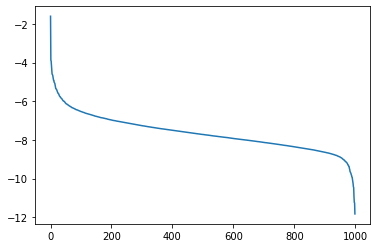

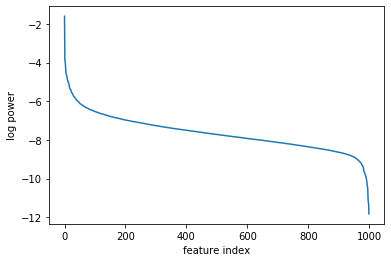

0.9001099840263448 580


In [92]:
total_power = sum(s**2)
power_pct = s**2/total_power
#plt.plot(range(len(s)), sorted(np.log(power_pct), reverse=True))
plt.plot(range(len(s)), sorted(np.log(power_pct), reverse=True))

fig, ax = plt.subplots()
ax.plot(range(len(s)), sorted(np.log(power_pct), reverse=True))
ax.set_ylabel("log power")
ax.set_xlabel("feature index")
plt.show()

i, sum_p = 0, 0
power_pct_sorted = sorted(power_pct, reverse = True)
while (sum_p < 0.9):
    sum_p+= power_pct_sorted[i]
    i+=1
print (sum_p, i)

In [85]:
sum(power_pct_sorted[0:100])

0.5581829411262805

In [93]:
vh.shape

(1000, 1000)

In [ ]:
+